## wk 3 : Regression algorithm

# Recap



머신 러닝의 학습 방법은 크게 supervised learning과 unsupervised learning으로 나눌 수 있다.  
#### **Supervised learning**
1) Classification (분류) - 데이터가 categorical, discrete한 경우에, data가 속할 클래스를 찾아 분류하고자 할때 사용함.  
2) Regression (회귀)  - 데이터가 continuous한 경우에 대해, feature variable과 target variable의 관계를 찾아낸다. 임의의 숫자를 예측하고자 함.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbblCkC%2FbtqEq8rEkUa%2FLM1DLkUgBku9ApbkTYX90K%2Fimg.png' width='600' height='300'/>

# 1. Linear Regression (선형 회귀)

## 1-1. Hypothesis (가설)

**Univariate Linear Regression**(특성이 하나인 선형 회귀)는 비교적 단순하고 성능이 좋다는 장점 때문에 많이 사용되는 대표적인 기법이다.  

**Univariate Linear Regression이란 무엇인가?**  
-하나의 independent variable x를 dependent variable인 y에 map해주는 linear function에 대입하는 model이다.  

쉽게 말해서 hypothesis of linear regression은 학습 데이터와 가장 잘 맞는 하나의 직선을 찾는 과정에서 쓰이는 바로 그 직선의 방정식이라고 할 수 있겠다.

$$\mathrm H(x)=Wx + b$$ 

- $W$ : weight(가중치)
- $b$ : bias(편향)   
- 중학교때 배웠던 직선의 방정식과 연관지어 생각해보면, weight는 기울기를, bias는 y절편에 해당된다.

<img src='https://wikidocs.net/images/page/53560/그림3.PNG' width='500' height='320'/>

## 1-2. Cost function (비용 함수)

비용함수는 데이터의 실제 값(y)과 가장 **오차가 작은** 가설함수(H(x)) 를 도출하기 위해 사용되는 함수이다.  
우리는 위에서 정의한 가설 함수의 파라미터들(W, b)를 update해서 데이터를 가장 잘 설명하는 가설 함수를 찾고 싶다.  
실제 값과 예측 값 사이의 거리는 비용(cost 혹은 오차)라고 한다. 이때 MSE(Mean Squred Error,평균 제곱 오차)를 구하는 방법은 다음과 같다.  

$$\mathrm{Cost \; function :} \; cost(W, b)=\frac{1}{2n}\sum\limits_{i=1}^n(\hat{y}^{i}-y^{i})^{2} = \frac{1}{2n}\sum\limits_{i=1}^n(h_{\theta}(x^{i})-y^{i})^{2}$$  
  
  - n : 데이터 개수(data size)
  -  $i$ : 각 데이터의 인덱스 
  - $\hat{y}^{i}$ : 선형 회귀에 의한 데이터 예측 값값
 
평균 제곱 오차(MSE) : 오차의 제곱합에 대한 평균  
명심해야 할 것은 바로 우리는 이 비용 함수 값이 *가장 작게* 되는 경우를 찾고 있다는 것이다.

In [ ]:
# 드라이브에 접근하기 위해 필요한 라인입니다 (코랩)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


            YearsExperience   Salary
Unnamed: 0                          
0                       1.2  39344.0
1                       1.4  46206.0
2                       1.6  37732.0
3                       2.1  43526.0
4                       2.3  39892.0





Text(0.5, 1.0, 'Salary for experience')

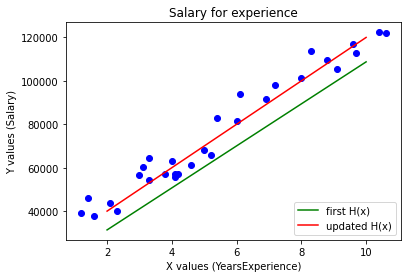

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#load dataset
df = pd.read_csv('/content/drive/MyDrive/prometheus/basic_study_2023/wk3/Salary_dataset.csv').set_index('Unnamed: 0')
print(df.head())
print('\n\n')

plt.scatter(df['YearsExperience'], df['Salary'], color='b')

# first hypothesis function
x = np.array([2, 4, 6, 8, 10])
y = 9675*x + 12000
plt.plot(x, y, c='g', label = 'first H(x)')

# updated function
y2 = 10000*x + 20000
plt.plot(x, y2,c='r', label = 'updated H(x)')

plt.xlabel("X values (YearsExperience)")
plt.ylabel("Y values (Salary)")
plt.legend(loc = 4)
plt.title("Salary for experience")

#직관적인 이해를 돕기위해 임의로 그린 그래프임을 참고하세요.

## 1-3. Optimizer algorithm : Gradient Descent (경사하강법)

1-2에서 정의한 cost function의 값을 최소화 하기 위해서 사용되는 알고리즘을 옵티마이저(optimizer) 혹은 최적화 알고리즘이라고 칭한다. 가장 기본적인 옵티마이저 알고리즘에는 경사하강법이 있다.  
  
 **Assumption**  
보다 쉬운 이해를 위해 cost function의 bias를 0으로 가정하자. 
$$\mathrm cost(W)=\frac{1}{2n}\sum\limits_{i=1}^n(\hat{y}^{i}-y^{i})^{2} $$  
  
  
<img src= 'https://vitalflux.com/wp-content/uploads/2020/09/Screenshot-2020-09-18-at-9.35.13-AM.png' width='300' height='220'/>   
위 그림은 W와 cost의 관계를 시각화한 것임을 알 수 있다. 머신은 임의의 초기값(initia weight)을 정한 다음 cost가 최소가 되는 지점을 향해 W를 업데이트 해다가게된다. 이때 사용되는 것이 Gradient Descent이며 비용 함수의 접선의 기울기가 가장 낮은 0을 향해 기울기 값을 조정해나간다.  


$$\mathrm\; W ≔ W - \alpha\frac{\partial}{\partial W}cost(W)$$
  
- ≔ :  assignment(update variable after calculation)
- $\alpha$ : learning rate
- $\frac{\partial}{\partial W}cost(W)$ : derivative term  

Learning rate(학습률)은 hyperparameter로, parameter(step의 크기)를 조절한다. $\alpha$가 너무 작으면 Learning step이 너무 작아 계산량이 많아서 시간이 오래 걸린다는 문제가 있고 $\alpha$가 지나치게게 커지는 경우 W의 value가 발산(divergence)할 수 있기때문에, 실험적으로 가장 적절한한 $\alpha$를 찾아낼 필요가 있다. 

<img src='https://yganalyst.github.io/assets/images/ML/chap3/gd2.png' width='450' height='250'/>

cost function의 gradient를 계산하는 방법에는 batch GD, mini batch GD, 확률적 경사 하강법(Stochastic gradient descent)등이 있다. 

## 1-4. Regularization (규제)

모델이 test dataset에 overfitting(과대 적합)하는 것을 막기 위해 사용된다. 선형 회귀의 경우 regularization을 통해 기울기를 조정한다.  

<img src='https://www.analyticsvidhya.com/wp-content/uploads/2015/02/underfitting-overfitting.png' width='650' height='200'/>  
Linear regression model에 regularization을 추가한 model을 릿지(ridge)와 라쏘(lasso)라고 부른다.   
1) **Ridge regression** - 계수를 제곱한 값을 기준으로 규제 적용
- L2 Regularization 이용 (L2 norm(aka Euclidean distance)을 이용한 regularization)
- `sklearn.linear_model`에서 `Ridge`를 import해 사용가능하다.  

$$\mathrm J(\theta) = MSE(\theta) + \lambda\sum_{j=0}^{p}\theta{j}^2$$

2) **Lasso regression** - 계수의 절댓값을 기준으로 규제를 적용
- L1 Regularization 이용 (L1 norm(aka Manhattan distance)을 이용한 regularization)
- feature selection이 가능해 가지고 있는 data의 feature에 대해 잘 알고 있을때 사용하면 좋다. 
- `sklearn.linear_model`에서 `Lasso`를 import해 사용가능하다.

$$\mathrm J(\theta) = MSE(\theta) + \lambda\sum_{j=0}^{p}|\theta{j}|$$


- $\lambda$ : hyperparameter, regularization의 강도 조절
- hyperparameter : 머신러닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터

## Polynomial Regression (다항 회귀)

  

분석하고자 하는 데이터의 변수들이 linear한 관계가 아니라 곡선형인 경우 regression model의 함수는 다음과 같이 일반화하여 표현할 수 있다.  

$$\mathrm y = W_{0} + W_{1}x + ... + W_{d}x^d$$  
  
  - d : 데이터 분포의 차원
  - scikit-learn에서 PolynomialFeatures를 사용하면 된다.

## 선형 회귀 예제

In [ ]:
# 위의 cost function section에서 언급한 dataset을 활용한다.
#df = pd.read_csv('/content/drive/MyDrive/prometheus/basic_study_2023/wk3/Salary_dataset.csv').set_index('Unnamed: 0')
# print(df.head())
# plt.scatter(df['YearsExperience'], df['Salary'], color='b')
# plt.xlabel("X values (YearsExperience)")
# plt.ylabel("Y values (Salary)")
# plt.title("Salary for experience")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 구분
X = (df[['YearsExperience']])
y = df['Salary']

print(X.shape, y.shape) #2차원 배열
#split to train set & test set
X_train, X_test, y_train,  y_test = train_test_split(
    X, y, random_state = 42)

(30, 1) (30,)


In [ ]:
# model 정의
lr = LinearRegression()
# model 학습
lr.fit(X_train, y_train)

print(lr.coef_, lr.intercept_)

[9371.0160797] 24542.025828030717


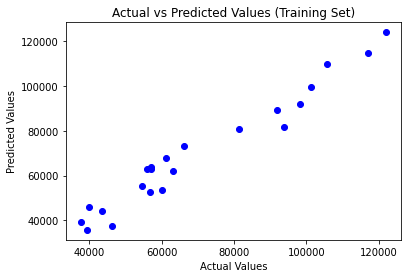

0.9347210011126783


In [ ]:
plt.scatter(y_train, lr.predict(X_train), color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Training Set)')
plt.show()

print(lr.score(X_test, y_test))

Text(0.5, 1.0, 'Salary for experience')

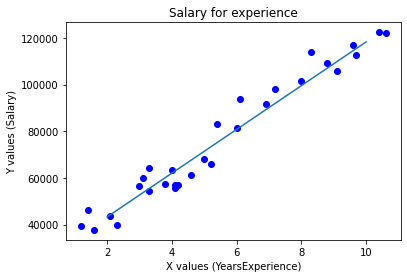

In [ ]:
plt.plot([2, 10], [2*lr.coef_+lr.intercept_, 10*lr.coef_+lr.intercept_])
plt.scatter(df['YearsExperience'], df['Salary'], color='b')
plt.xlabel("X values (YearsExperience)")
plt.ylabel("Y values (Salary)")
plt.title("Salary for experience")

# 2. Logistic regression (로지스틱 회귀)

로지스틱 '회귀'라고 칭하지만 classification에서 잘 사용된다. 대표적인 예시로는 받은 메일이 스팸인지 아닌지를 이진 분류(binary classification)해주는 문제에 대해서 적용가능하다. 

## 2-1. Binary Classification (이진 분류)

Logistic regression explanation section에서 hypothesis function이 y=Wx+b(혹은 H(x) = Wx)라는 직선 함수 꼴임을 확인했다. 그러나 이진 분류 작업의 경우 이러한 함수는 잘 동작하지 않는다(결과값의 범위가 이를테면 0과 1사이가 아니기 때문에).  
따라서 binary classification에서는 그 대신에 sigmoid function(시그모이드 함수)를 이용한다. (Let bias = 0)

$$ \mathrm{sigmoid \, function \, } \;  \,$$
 $$ \mathrm g(z) = 1/(1+e^{-z}), z = \theta^{T}x$$ 

$$ h_{\theta}(x) = \frac{1}{1+e^{-\theta^{T}x}} $$  

<img src='https://studymachinelearning.com/wp-content/uploads/2019/09/sigmoid_graph.png' width='400' height='300'/>  

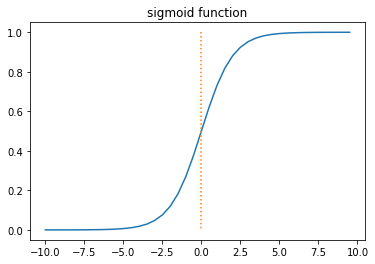

In [ ]:
#sigmoid함수를 직접 작성해보자.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.arange(-10.0, 10.0, 0.5)
y = sigmoid(x)
plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':')
plt.title('sigmoid function')
plt.show()

위를 통해 x>0인 경우 x값이 커질수록 1에 가까워지며 x<0인 경우 x값이 작아질수록 0에 수렴한다는 사실을 확인 가능하다.(Digression: 선형 회귀에서 가중치는 그래프에서 기울기를 나타냈지만, 로지스틱 회귀에서 가중치는 그래프의 경사도를 결정한다. )

## 2-2. Cost function

우리는 실제 값이 1인 경우에 예측 값(h(x))이 1과 가까우면 비용이 작고, 예측 값이 0에 가까우면 비용이 매우 크다는 사실을 안다. 이를 바탕으로 cost function을 작성하면 다음과 같다. 
  
  $$Cost(h_{\theta}(x), y) = \begin{cases} -\log(h_{\theta}(x)) \qquad \; \,  (y=1)\\ -\log(1-h_{\theta}(x)) \quad (y=0)\\ \end{cases}$$

  이 식을 하나로 통일하고, 오차의 평균을 cost function으로 하여 정의하면 다음과 같다.
  
  $$Cost(h_{\theta}(x), y) = (-1/n)\sum_{i=1}^{n}[y^{(i)}logH(x^{(i)}) + (1 - y^{(i)})log(1 - H(x^{(i)}))]$$


## 2-3. 다중 분류

다중 분류 로지스틱 회귀분석의 경우 기본 매커니즘은 (2개의 class를 분류하는)로지스틱 회귀분석과 동일하나, hypothesis function을 sigmoid function이 아닌 **softmax function**을 사용한다.  
Softmax function은 다음과 같이 작성할 수 있다.  
$$\sigma_{i}=\frac{e^{z_{i}}}{\sum_{j=1}^{k} e^{z_{j}}}$$

$$z = \theta^{T}x$$ 


## 로지스틱 회귀 예제

kaggle dataset을 이용해 간단한 로지스틱 회귀 분석을 해보자.  

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

df = pd.read_csv('/content/drive/MyDrive/prometheus/basic_study_2023/wk3/breast_cancer.csv')
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.iloc[:, -1].value_counts() #2종류

2    444
4    239
Name: Class, dtype: int64

In [ ]:
# x, y로 데이터 구분
X = df.iloc[:, 1:-1].values #8개 features
y = df.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# model 정의
model = LogisticRegression(penalty='l2', C=1.0, max_iter=1000) #penalty : default는 Ridge regression
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
print(model.coef_, model.intercept_) #로지스틱 회귀 방정식의 계수들

[[ 0.1875454   0.50929689  0.22585137 -0.01960632  0.43593302  0.37076107
   0.27325632  0.54934798]] [-7.81820528]


In [ ]:
import numpy as np
decisions = np.round(model.decision_function(X_test[15:20]), decimals=3)
print(decisions) #z값 계산

[-2.763 -3.902 -0.105  4.411 -4.564]


In [ ]:
from scipy.special import expit
print(expit(decisions)) 

[0.05935664 0.01980145 0.47377409 0.98800265 0.01031283]


In [ ]:
print(model.predict_proba(X_test[20:25])) #분류 클래스를 예측한 확률

[[2.86631235e-06 9.99997134e-01]
 [9.95059942e-01 4.94005818e-03]
 [9.80469822e-01 1.95301778e-02]
 [1.21275237e-02 9.87872476e-01]
 [4.09870527e-05 9.99959013e-01]]


In [ ]:
print(model.predict(X_test)[20:25])

[4 2 2 4 4]


In [ ]:
print(y_test[20:25])

[4 2 2 4 4]
